# EDA Notebook
<a id="top"></a>

Below, I will look at the data of the two primary datasets, to inform data preparation and modelling decisions later on.

- Python Questions from Stack Overflow
https://www.kaggle.com/datasets/stackoverflow/pythonquestions
- StackSample: 10% of Stack Overflow Q&A
https://www.kaggle.com/datasets/stackoverflow/stacksample?datasetId=265&sortBy=commentCount


As discussed in the Readme and main project notebook, the two components of this project are:

- Predicting post quality
- Suggesting tags

I'll begin with a thorough analysis of the Python dataset, in terms of its Questions, Answers, and Tags components, and then I'll explore the "10%" dataset, with a focus on tag data, as I think that will be more useful for the tag-suggestion work.

## Contents

### 1. [Questions](#q)
### 2. [Answers](#a)
### 3. [Tags](#t)
### 4. [10% of SO Q&A](#10p)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

*********************
<a id="q"></a>
## 1. Questions
[Back to Top](#top) | [Next Section](#a)
*********************

This first .csv file contains all the main question data - the title, body, user/post ID, and creation time data.

In [5]:
def data_stats(df):
    display(df.head())
    display(df.info())
    display(df.describe())

In [20]:
questions = pd.read_csv('../data/QA_python/Questions.csv', encoding='latin1')
answers = pd.read_csv('../data/QA_python/Answers.csv', encoding='latin1')
tags = pd.read_csv('../data/QA_python/Tags.csv', encoding='latin1')

In [21]:
data_stats(questions)

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607282 entries, 0 to 607281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            607282 non-null  int64  
 1   OwnerUserId   601070 non-null  float64
 2   CreationDate  607282 non-null  object 
 3   Score         607282 non-null  int64  
 4   Title         607282 non-null  object 
 5   Body          607282 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 27.8+ MB


None

,Id,OwnerUserId,Score
count,6.072820e+05,6.010700e+05,607282.000000
mean,2.371960e+07,2.519595e+06,2.283137
std,1.124715e+07,1.910375e+06,19.285578
min,4.690000e+02,2.500000e+01,-44.000000
25%,1.485519e+07,8.539340e+05,0.000000
50%,2.531897e+07,2.107677e+06,1.000000
75%,3.358823e+07,3.991164e+06,2.000000
max,4.014336e+07,7.044992e+06,5524.000000


In [47]:
# Let's look at a sample questions title and body

first_q = questions.iloc[np.random.randint(0,607282)]

print(first_q['Title'])
print('='*70)
print(first_q['Body'])

Django User Model: add extra behavior when saving
<p>I am using Django 1.6.11 and I want to basically add more additional behavior when a User Model is changed on Django admin site. Currently what I am doing is like this in <code>admin.py</code></p>

<pre><code>from django.contrib.auth.models import User

class UserAdmin(admin.ModelAdmin):
    def save_model(self, request, obj, form, change, *args, **kwargs):
        super(UserAdmin, self).save_model(
            request, obj, form, change, *args, **kwargs)
        if change and obj.groups.filter(name='GTO').exists():
            user_perms = obj.user_permissions.all()
            print(user_perms)
            # and do something else

admin.site.unregister(User)
admin.site.register(User, UserAdmin)
</code></pre>

<p>The only problem with this is that <code>obj</code> does not contain current change: so if obj previously does not belong to <code>'GTO'</code> group. Now someone adds the group to the user on Django admin website <code>obj

In [22]:
# Let's see the distribution of title/body lengths

# create columns with title/body lengths (in characters)

questions['title_length'] = questions['Title'].map(len)
questions['body_length'] = questions['Body'].map(len)

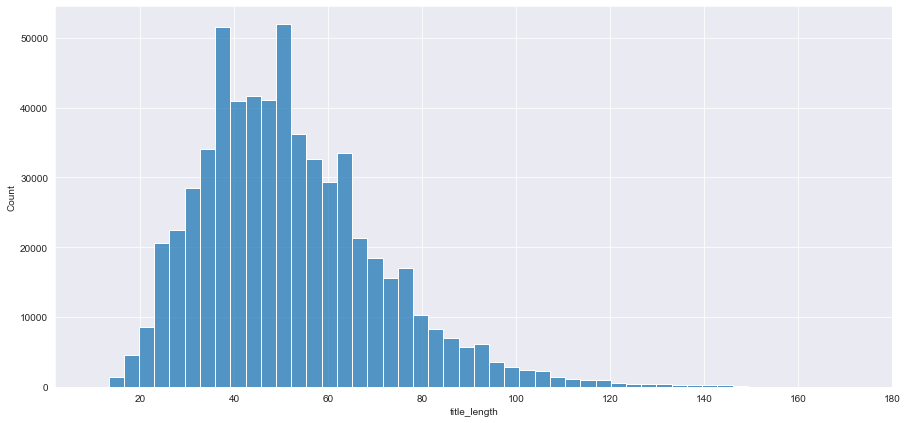

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=questions, x='title_length', bins=50);

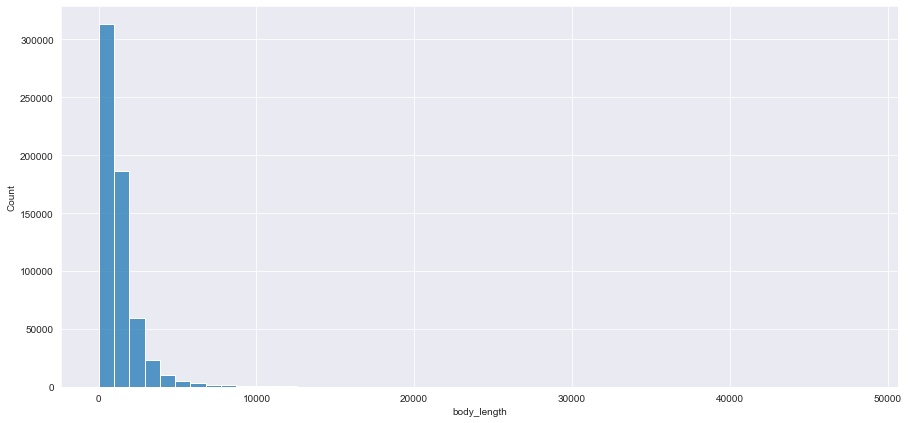

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=questions, x='body_length', bins=50);

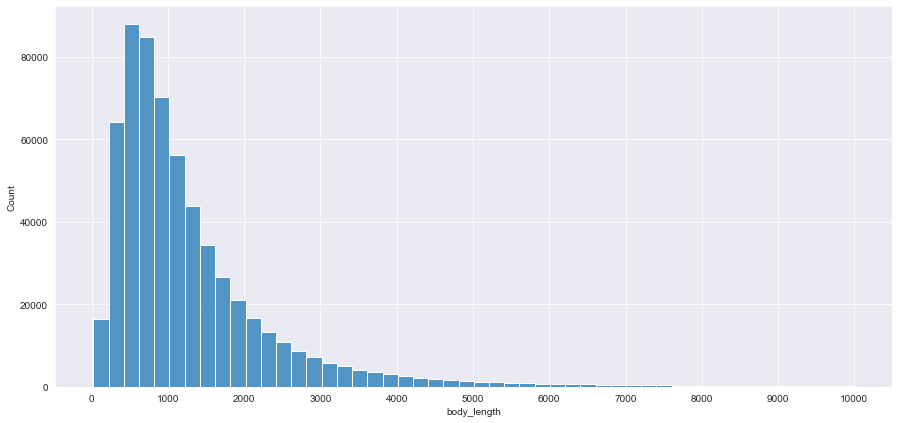

In [31]:
# zooming in on the sub-10000-character body texts
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=questions[questions['body_length']<10000], x='body_length', bins=50)
ax.set_xticks(list(range(0,10001,1000)));

In [32]:
# Next, distribution of post counts over time

questions['CreationDate'] = pd.to_datetime(questions['CreationDate'], infer_datetime_format=True)
questions['year'] = [x.year for x in questions['CreationDate']]
questions.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,title_length,body_length,year
0,469,147.0,2008-08-02 15:11:16,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,70,445,2008
1,502,147.0,2008-08-02 17:01:58,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,39,314,2008
2,535,154.0,2008-08-02 18:43:54,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,51,624,2008
3,594,116.0,2008-08-03 01:15:08,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,46,91,2008
4,683,199.0,2008-08-03 13:19:16,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,62,317,2008


In [33]:
for year in [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    print(year,"question count:",len(questions[questions['year']==year]))

2008 question count: 1927
2009 question count: 12417
2010 question count: 26349
2011 question count: 40910
2012 question count: 61294
2013 question count: 90297
2014 question count: 110229
2015 question count: 133319
2016 question count: 130540


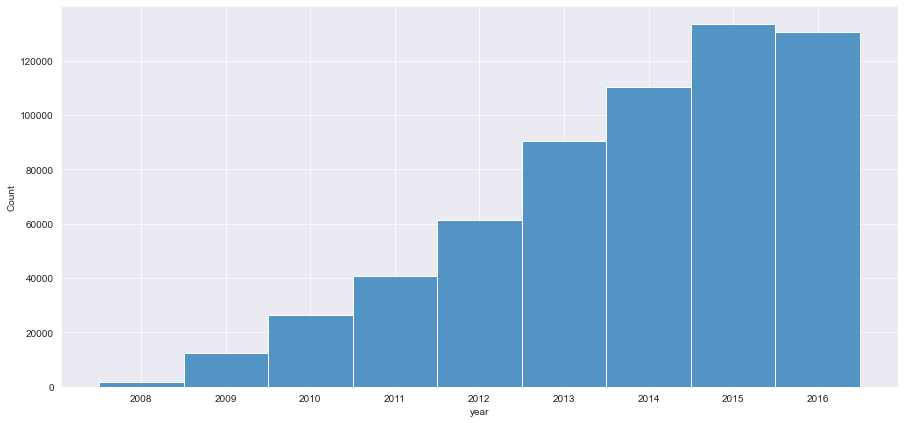

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(questions, x='year', discrete=True)
ax.set_xticks(list(range(2008,2017)));

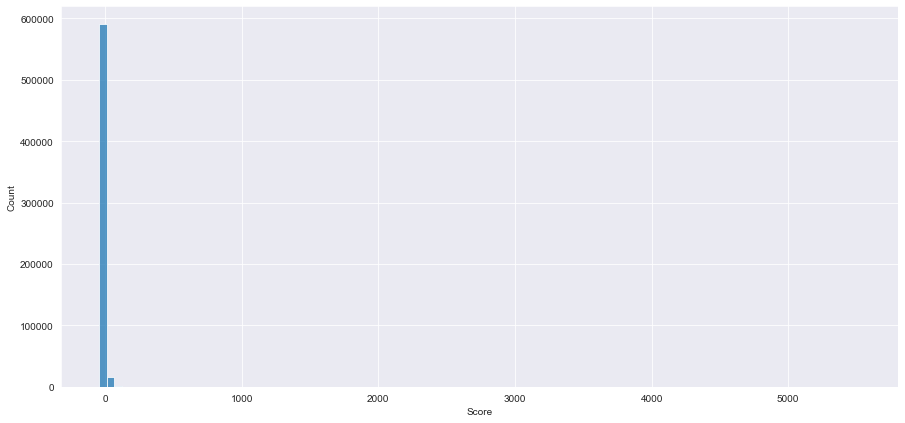

In [70]:
# Post score distribution
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(questions['Score'], bins=100);

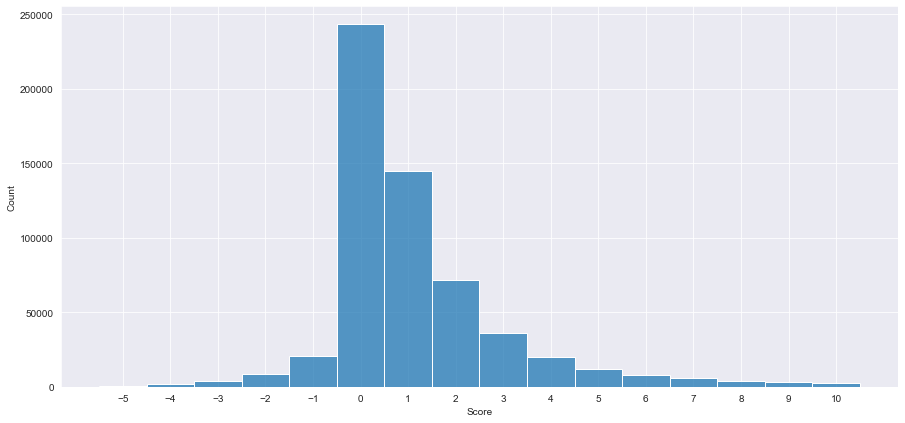

In [85]:
# zooming in on scores between -5 and 10
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(questions[(questions['Score']<=10) & (questions['Score']>=-5)], x='Score', discrete=True)
ax.set_xticks(list(range(-5,11)));

In [88]:
print(f"Count of questions with negative scores: \t{len(questions[questions['Score']<0])}")
print(f"Count of questions with scores of 0: \t\t{len(questions[questions['Score']==0])}")
print(f"Count of questions with positive scores: \t{len(questions[questions['Score']>0])}")

Count of questions with negative scores: 	36310
Count of questions with scores of 0: 		243284
Count of questions with positive scores: 	327688


This suggests a good breakdown of posts between Positive and 0/Negative Scores 

*******

Let's look at answer counts and other stats per post.

In [89]:
# Calculating # of answers per post

ids = list(questions['Id'])
questions['answer_count'] = [len(answers[answers['ParentId']==x]) for x in ids]

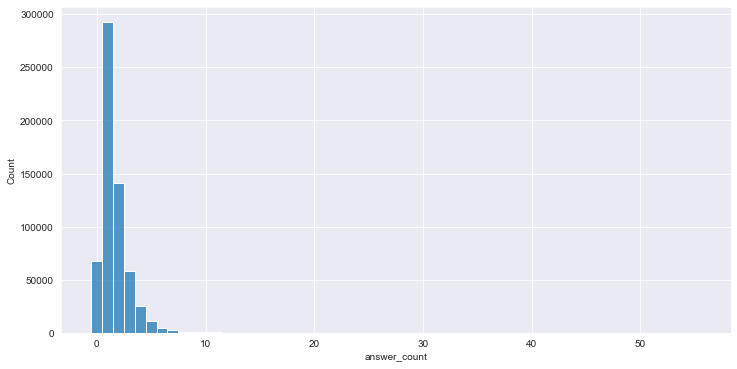

In [93]:
# Distribution of counts

fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions, x='answer_count', discrete=True);

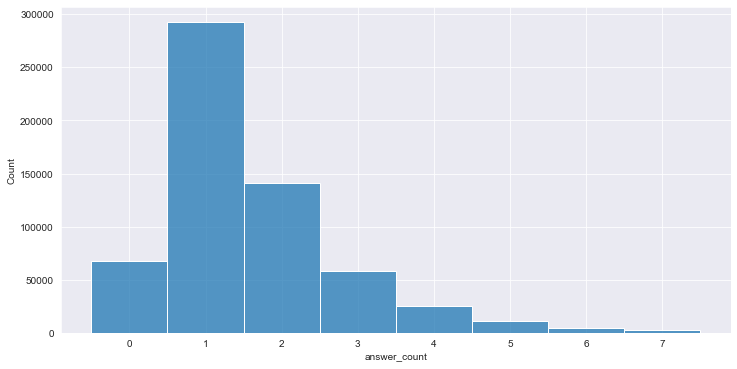

In [97]:
# Zooming in on 0-8 answers per post

fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions[questions['answer_count']<8], x='answer_count', discrete=True)
ax.set_xticks(list(range(0,8)));

In [98]:
questions['avg_answer_score'] = [answers[answers['ParentId']==x]['Score'].mean() for x in ids]

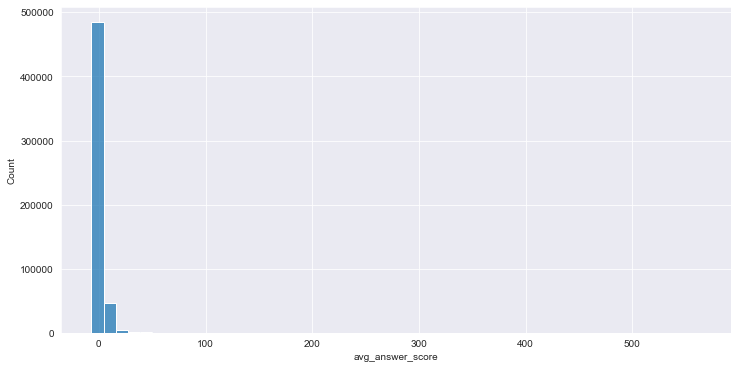

In [110]:
# Average answer score (per post)

fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions, x='avg_answer_score', bins=50);

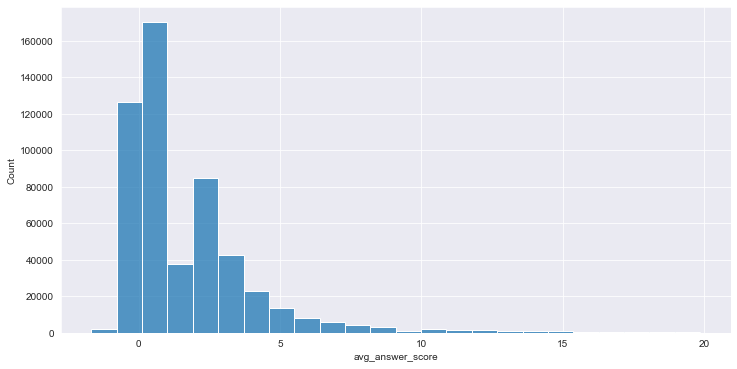

In [135]:
# Zooming in on -2 -> 20

fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions[(questions['avg_answer_score']<20)&(questions['avg_answer_score']>-2)],\
                  x='avg_answer_score', bins=24);

In [99]:
questions['max_answer_score'] = [answers[answers['ParentId']==x]['Score'].max() for x in ids]

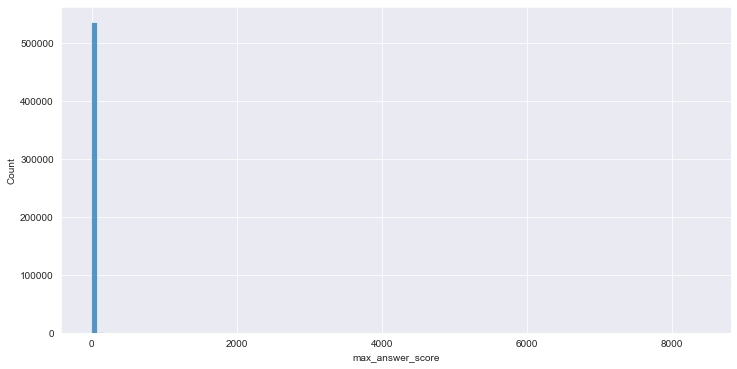

In [112]:
# Max answer score (per post)

fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions, x='max_answer_score', bins=100);

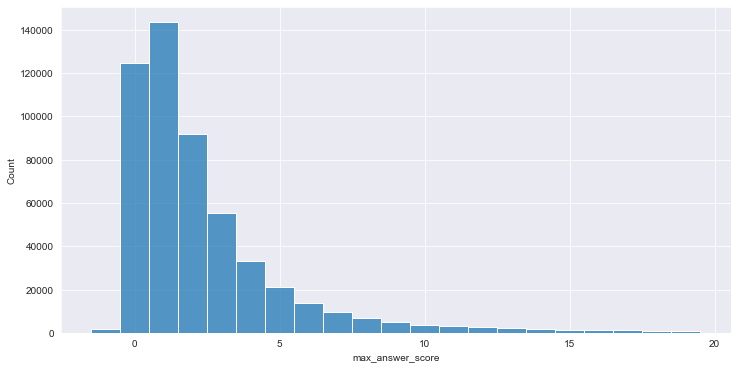

In [138]:
# Zooming in on -2 -> 20

fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions[(questions['max_answer_score']<20)&(questions['max_answer_score']>-2)],\
                  x='max_answer_score', discrete=True);

<Figure size 1080x1080 with 0 Axes>

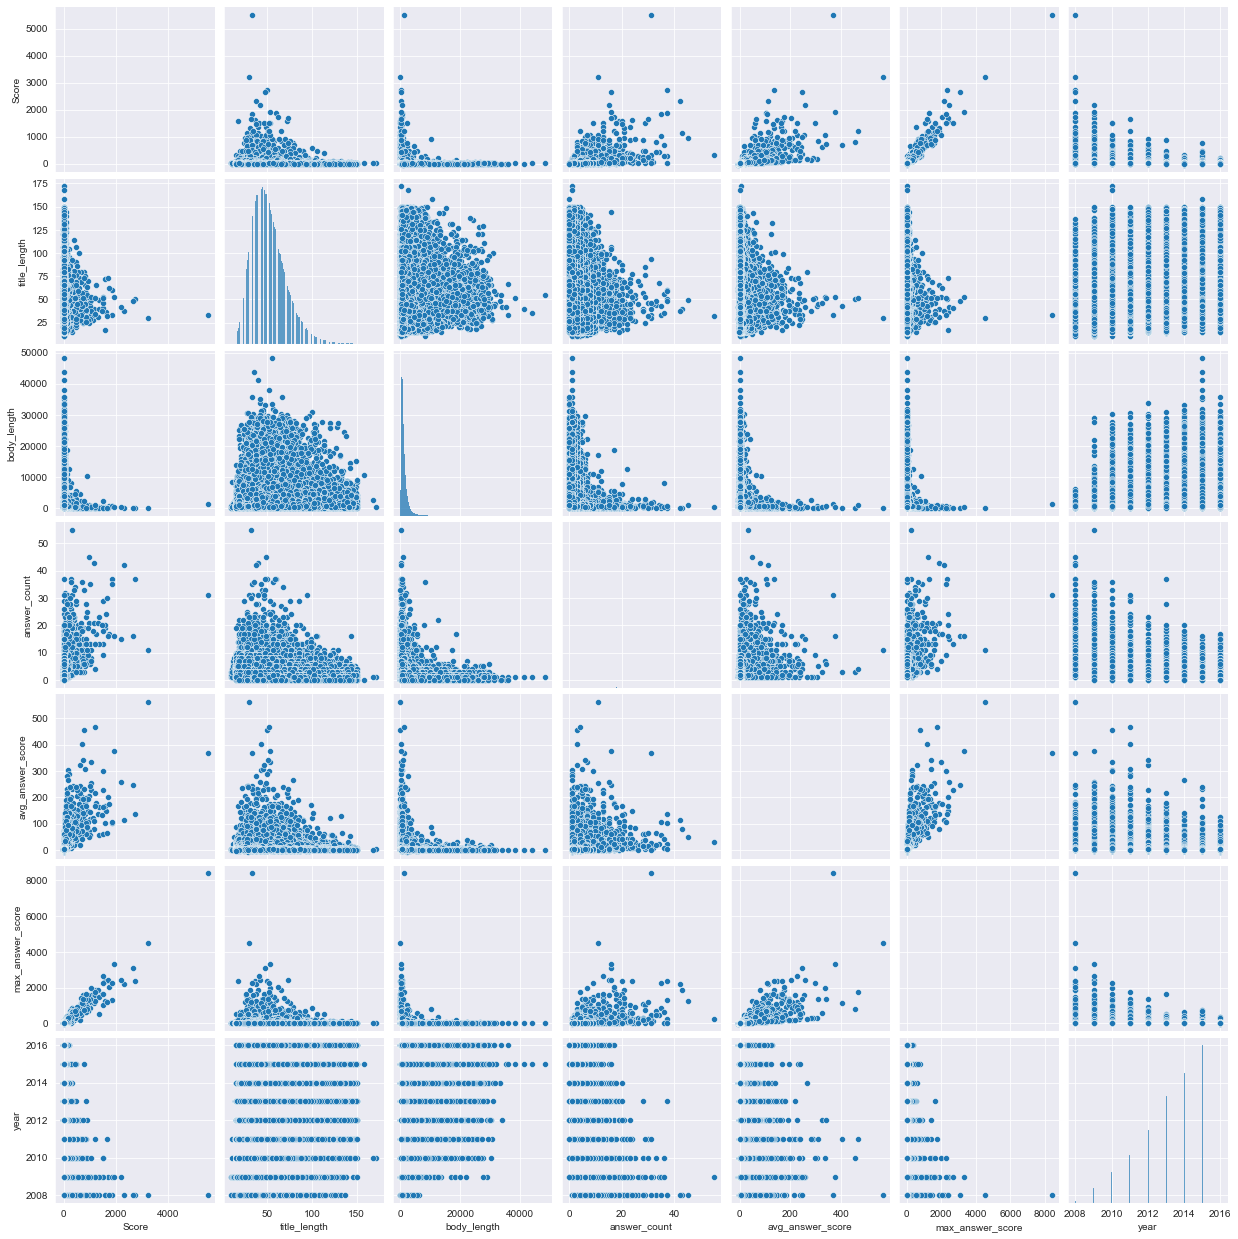

In [103]:
# Let's see a pairwise plot of features, and see if any correlations stand out

fig = plt.figure(figsize=(15, 15))
sns.pairplot(data=questions[['Score','title_length','body_length',\
                                  'answer_count','avg_answer_score','max_answer_score',\
                                  'year']])

*********************
<a id="a"></a>
## 2. Answers
[Back to Top](#top) | [Previous Section](#q)| [Next Section](#t)

I'll do some basic checks of the Answers data, and see if there is a similar distribution of scores.

In [139]:
data_stats(answers)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987122 entries, 0 to 987121
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            987122 non-null  int64  
 1   OwnerUserId   981755 non-null  float64
 2   CreationDate  987122 non-null  object 
 3   ParentId      987122 non-null  int64  
 4   Score         987122 non-null  int64  
 5   Body          987122 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.2+ MB


None

,Id,OwnerUserId,ParentId,Score
count,9.871220e+05,9.817550e+05,9.871220e+05,987122.000000
mean,2.160744e+07,1.589642e+06,2.053496e+07,3.028437
std,1.179488e+07,1.649346e+06,1.195486e+07,21.263246
min,4.970000e+02,1.000000e+00,4.690000e+02,-38.000000
25%,1.144775e+07,2.603030e+05,9.968532e+06,0.000000
50%,2.254188e+07,9.634650e+05,2.103550e+07,1.000000
75%,3.205469e+07,2.433810e+06,3.115233e+07,3.000000
max,4.014337e+07,7.044747e+06,4.014319e+07,8384.000000


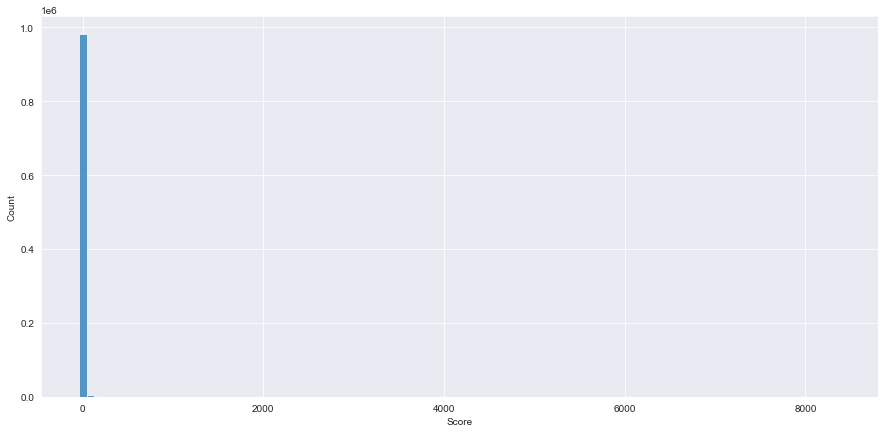

In [142]:
# distribution of Answer scores

fig = plt.figure(figsize=(15,7))
ax = sns.histplot(answers, x='Score', bins=100);

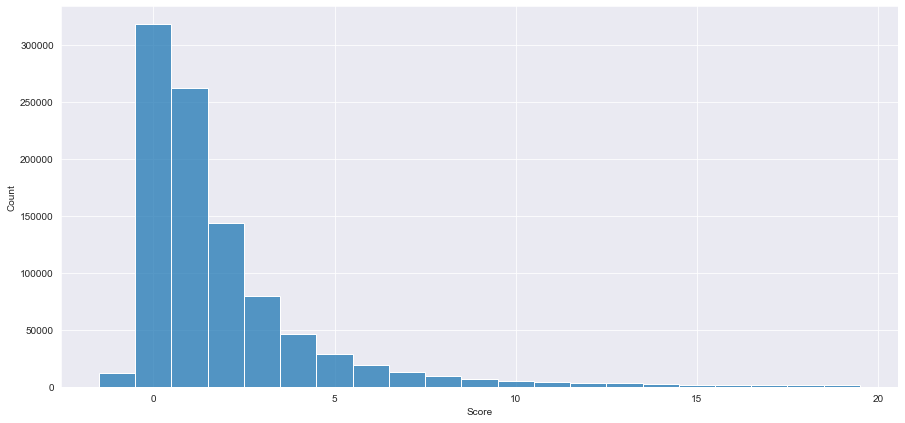

In [145]:
# zooming in on -2 -> 20

fig = plt.figure(figsize=(15,7))
ax = sns.histplot(answers[(answers['Score']<20)&(answers['Score']>-2)], x='Score', discrete=True);

In [146]:
def a_target(x):
    if x > 0:
        return 2
    if x == 0:
        return 1
    if x < 0:
        return 0

answers['target'] = answers['Score'].map(a_target)

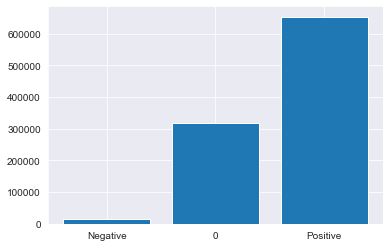

In [159]:
# relative amounts of negative/0/positive answer scores

neg = len(answers[answers['target']==0])
zero = len(answers[answers['target']==1])
pos = len(answers[answers['target']==2])

plt.bar(x=['Negative', '0', 'Positive'], height=[neg, zero, pos]);

*********************
<a id="t"></a>
## 3. Tags
[Back to Top](#top) | [Previous Section](#a)| [Next Section](#10p)

I'll start with looking at how tags and posts interact - that is, number of tags per each (post) Id, and how many Ids use each tag.

In addition, I'll look at how many posts are 'touched' by different numbers of top/most-used tags.

In [149]:
tags.head()

,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python


In [150]:
# creating tag-per-id and id-per-tag dataframes

tag_per_id = tags.groupby('Id').size()
id_per_tag = tags.groupby('Tag').size()

In [151]:
tagid_df = pd.DataFrame()
tagid_df['Id'] = tag_per_id.index.values
tagid_df['tag_count'] = tag_per_id.values

In [152]:
idtag_df = pd.DataFrame()
idtag_df['tag'] = id_per_tag.index.values
idtag_df['id_count'] = id_per_tag.values

In [153]:
tagid_df.head()

,Id,tag_count
0,469,4
1,502,4
2,535,3
3,594,5
4,683,3


In [154]:
tagid_df.describe()

,Id,tag_count
count,6.072830e+05,607283.000000
mean,2.371963e+07,3.104118
std,1.124716e+07,1.146153
min,4.690000e+02,1.000000
25%,1.485520e+07,2.000000
50%,2.531898e+07,3.000000
75%,3.358825e+07,4.000000
max,4.014336e+07,5.000000


In [155]:
idtag_df.describe()

,id_count
count,16895.000000
mean,111.549867
std,4737.932598
min,1.000000
25%,1.000000
50%,4.000000
75%,17.000000
max,607283.000000


In [87]:
# .describe() data not counting the most-used tag, 'Python' (since all posts are Python posts)

idtag_df[idtag_df['id_count']<607283].describe()

,id_count
count,16894.000000
mean,75.609802
std,790.550132
min,1.000000
25%,1.000000
50%,4.000000
75%,17.000000
max,62818.000000


In [156]:
# create 'pct' column for percentage of all posts with this tag

idtag_df['pct'] = idtag_df['id_count'] / 607283

In [157]:
idtag_df = idtag_df.sort_values(by='pct', ascending=True).reset_index().drop('index', axis=1)

In [160]:
idtag_df

,tag,id_count,pct
0,managed-c++,1,0.000002
1,linguini,1,0.000002
2,linguaplone,1,0.000002
3,lineseries,1,0.000002
4,line.me,1,0.000002
...,...,...,...
16890,python-3.x,26814,0.044154
16891,pandas,26854,0.044220
16892,python-2.7,34616,0.057001
16893,django,62818,0.103441


In [192]:
# creating lists with data for % of posts with one of the top-n tags (by powers of 2, up to the max # of tags)

top_tag_counts = [str(2**x) for x in range(0,15)]
top_tag_pcts = []
for count in top_tag_counts:
    top_tags = list(idtag_df.iloc[-(int(count)+1):-1]['tag'])
    top_tag_pcts.append(len(tags[tags['Tag'].isin(top_tags)].groupby('Id').size())/len(tagid_df))

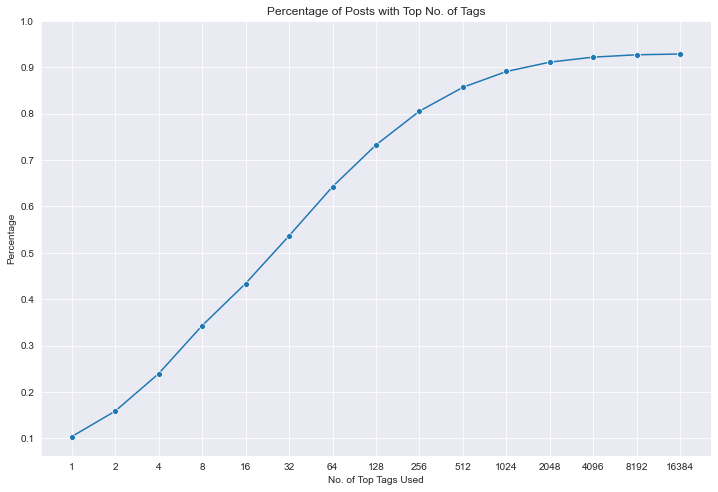

In [195]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=top_tag_counts, y=top_tag_pcts, marker='o')

ax.set_yticks([x/10 for x in range(1,11)])
ax.set_xticks(top_tag_counts)

ax.set_title("Percentage of Posts with Top No. of Tags")
ax.set_xlabel('No. of Top Tags Used')
ax.set_ylabel('Percentage');

Since a potential model would have to build separate individual models for each tag to predict, a cutoff point will need to be decided upon based on this graph.

*********************
<a id="10p"></a>
## 4. 10% of SO Q&A EDA
[Back to Top](#top) | [Previous Section](#t)

Here, I'll look at the alternative dataset with questions from ALL posts (not just with 'Python' tag)

I'll first look at the Tags csv, and look at the same graph of posts with top-n tags.

In [164]:
qbig = pd.read_csv('../data/QA_all/Questions.csv', encoding='latin1')
tbig = pd.read_csv('../data/QA_all/Tags.csv', encoding='latin1')

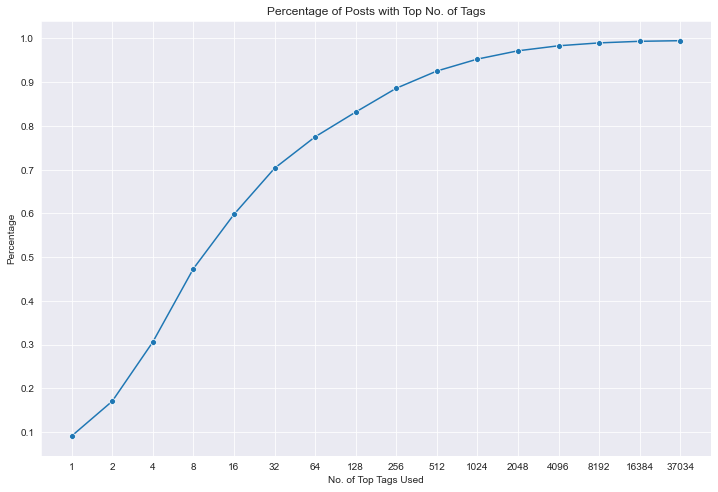

In [165]:
tag_per_id = tbig.groupby('Id').size()
id_per_tag = tbig.groupby('Tag').size()

tagid_df = pd.DataFrame()
tagid_df['Id'] = tag_per_id.index.values
tagid_df['tag_count'] = tag_per_id.values

idtag_df = pd.DataFrame()
idtag_df['tag'] = id_per_tag.index.values
idtag_df['id_count'] = id_per_tag.values

idtag_df['pct'] = idtag_df['id_count'] / len(tagid_df)
idtag_df = idtag_df.sort_values(by='pct', ascending=True).reset_index().drop('index', axis=1)

top_tag_counts = [str(2**x) for x in range(0,15)]+[str(len(idtag_df))]
top_tag_pcts = []
for count in top_tag_counts:
    top_tags = list(idtag_df.iloc[-(int(count)+1):-1]['tag'])
    top_tag_pcts.append(len(tbig[tbig['Tag'].isin(top_tags)].groupby('Id').size())/len(tagid_df))
    
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=top_tag_counts, y=top_tag_pcts, marker='o')

ax.set_yticks([x/10 for x in range(1,11)])
ax.set_xticks(top_tag_counts)

ax.set_title("Percentage of Posts with Top No. of Tags")
ax.set_xlabel('No. of Top Tags Used')
ax.set_ylabel('Percentage');

## Tag changes over time

I'd also like to see how the composition of the top tags changes over time.

First, I'll divide the posts by each quarter (3 months).

In [166]:
qbig['CreationDate'] = pd.to_datetime(qbig['CreationDate'], infer_datetime_format=True)

In [167]:
qbig['quarter'] = [x.quarter for x in qbig['CreationDate']]
qbig['year'] = [x.year for x in qbig['CreationDate']]
qbig['quarter'] = qbig['year'].apply(str).apply(lambda x: x[-2:]) + '-' + qbig['quarter'].apply(str)

In [168]:
qbig[['year', 'quarter']]

,year,quarter
0,2008,08-3
1,2008,08-3
2,2008,08-3
3,2008,08-3
4,2008,08-3
...,...,...
1264211,2016,16-4
1264212,2016,16-4
1264213,2016,16-4
1264214,2016,16-4


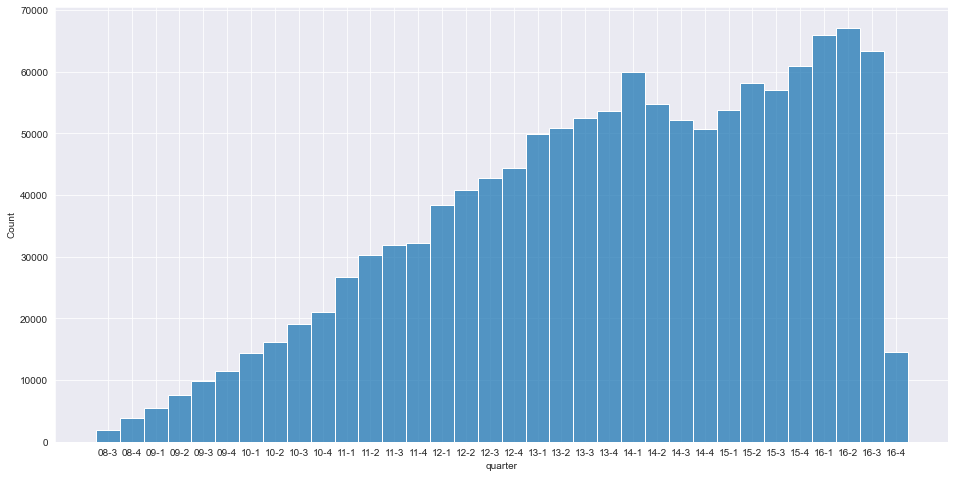

In [169]:
# Distribution of post counts per quarter

fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(qbig['quarter'], discrete=True);

In [171]:
# let's see just a basic % difference, of each quarter compared to the previous quarter,
# based on various top-n tags.

def plot_tag_deltas(df_q, df_t, top_n):

    all_quarters = list(df_q['quarter'].unique())

    top_tags_per_quarter = []

    for quarter in all_quarters:

        q_df = df_q[df_q['quarter']==quarter].copy()
        t_df = df_t[df_t['Id'].isin(q_df['Id'].unique())]

        tag_per_id = t_df.groupby('Id').size()
        id_per_tag = t_df.groupby('Tag').size()

        tagid_df = pd.DataFrame()
        tagid_df['Id'] = tag_per_id.index.values
        tagid_df['tag_count'] = tag_per_id.values

        idtag_df = pd.DataFrame()
        idtag_df['tag'] = id_per_tag.index.values
        idtag_df['id_count'] = id_per_tag.values
        idtag_df = idtag_df.sort_values(by='id_count', ascending=True).reset_index().drop('index', axis=1)

        top_tags = idtag_df.iloc[-top_n:].tag.values

        top_tags_per_quarter.append([quarter, list(top_tags)])
        
    pct_tags_different = []

    i = 0
    for tops in top_tags_per_quarter[1:]:
        prev_tops = top_tags_per_quarter[i][1]
        pct_different = 1 - (sum([1 for x in prev_tops if x in tops[1]])/top_n)

        pct_tags_different.append([tops[0], pct_different])
        i += 1
        
    pct_tags_df = pd.DataFrame(pct_tags_different, columns=['quarter','pct_change'])
    
    fig, ax = plt.subplots(figsize=(16,8))
    sns.barplot(data=pct_tags_df, x='quarter', y='pct_change', errwidth=0)
    ax.set_title(f"Quarterly change in usage of top-{top_n} tags")
    plt.show()

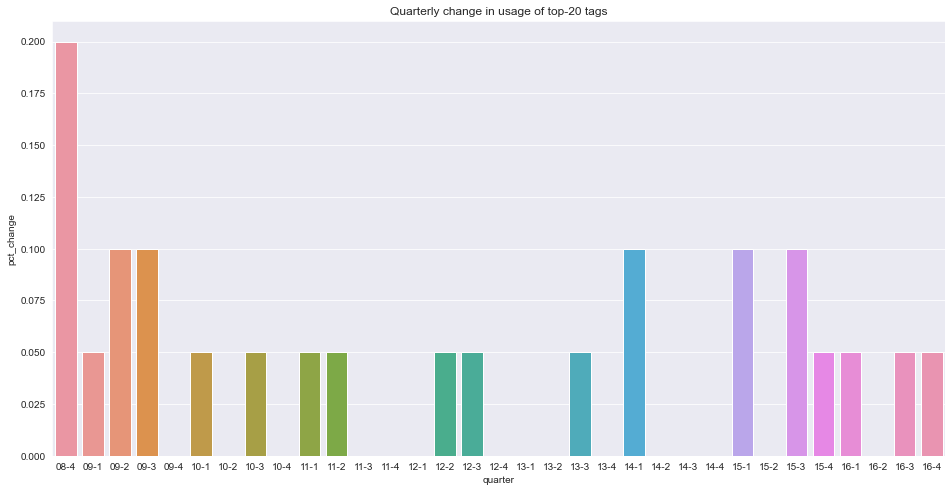

In [172]:
plot_tag_deltas(qbig, tbig, 20)

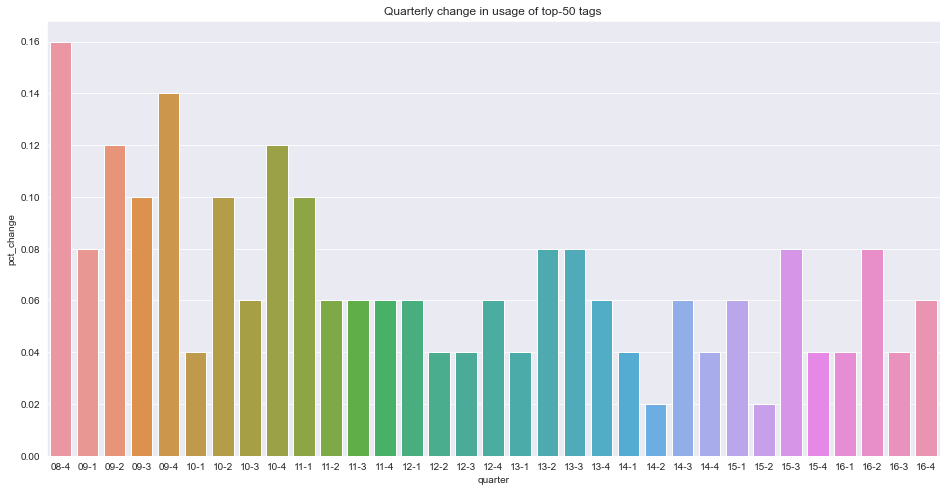

In [173]:
plot_tag_deltas(qbig, tbig, 50)

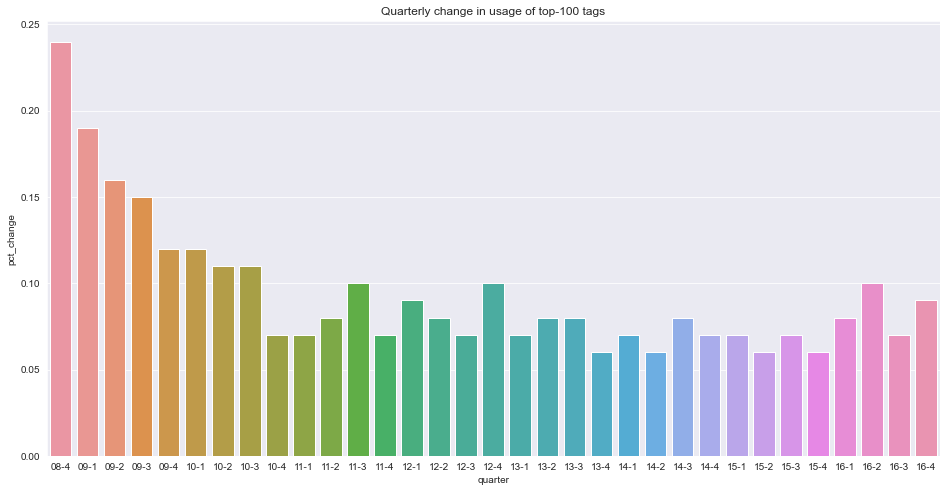

In [174]:
plot_tag_deltas(qbig, tbig, 100)

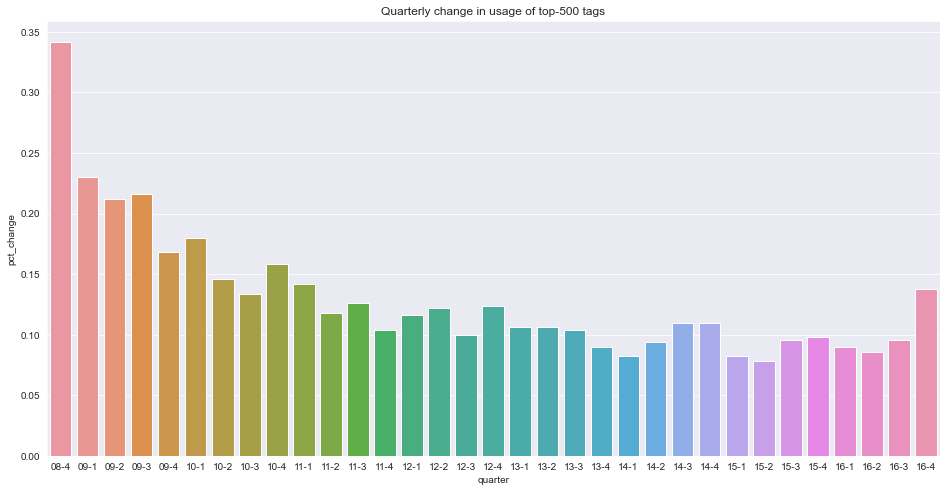

In [176]:
plot_tag_deltas(qbig, tbig, 500)

We can see that with more top-n tags, the shape of the change stabilizes in the top-100 tags graph.

As well, after around quarter 11-3 (about a third of the way through) the amount of change each quarter levels off and sits around roughly 10%. 

***
## RBO Analysis

For a more robust analysis here, we can also see the RBO (Rank Biased Overlap) score, which is a measure of similarity between ranked lists, to account for the order of the list as well as the composition of the list. This accounts as well for the possibility of all or none of the same items in each compared pair of lists.

Sources for following:

https://github.com/ragrawal/measures/blob/master/measures/rankedlist/RBO.py

https://ragrawal.wordpress.com/2013/01/18/comparing-ranked-list/

http://codalism.com/research/papers/wmz10_tois.pdf

In [177]:
# obtained from https://github.com/ragrawal/measures/blob/master/measures/rankedlist/RBO.py

def rbo_score(l1, l2, p = 0.98):
    """
        Calculates Ranked Biased Overlap (RBO) score. 
        l1 -- Ranked List 1
        l2 -- Ranked List 2
    """
    if l1 == None: l1 = []
    if l2 == None: l2 = []
    
    sl,ll = sorted([(len(l1), l1),(len(l2),l2)])
    s, S = sl
    l, L = ll
    if s == 0: return 0

    # Calculate the overlaps at ranks 1 through l 
    # (the longer of the two lists)
    ss = set([]) # contains elements from the smaller list till depth i
    ls = set([]) # contains elements from the longer list till depth i
    x_d = {0: 0}
    sum1 = 0.0
    for i in range(l):
        x = L[i]
        y = S[i] if i < s else None
        d = i + 1
        
        # if two elements are same then 
        # we don't need to add to either of the set
        if x == y: 
            x_d[d] = x_d[d-1] + 1.0
        # else add items to respective list
        # and calculate overlap
        else: 
            ls.add(x) 
            if y != None: ss.add(y)
            x_d[d] = x_d[d-1] + (1.0 if x in ss else 0.0) + (1.0 if y in ls else 0.0)     
        #calculate average overlap
        sum1 += x_d[d]/d * pow(p, d)
        
    sum2 = 0.0
    for i in range(l-s):
        d = s+i+1
        sum2 += x_d[d]*(d-s)/(d*s)*pow(p,d)

    sum3 = ((x_d[l]-x_d[s])/l+x_d[s]/s)*pow(p,l)

    # Equation 32
    rbo_ext = (1-p)/p*(sum1+sum2)+sum3
    return rbo_ext

In [178]:
def plot_tag_rbo(df_q, df_t, top_n):

    all_quarters = list(df_q['quarter'].unique())

    top_tags_per_quarter = []

    for quarter in all_quarters:

        q_df = df_q[df_q['quarter']==quarter].copy()
        t_df = df_t[df_t['Id'].isin(q_df['Id'].unique())]

        tag_per_id = t_df.groupby('Id').size()
        id_per_tag = t_df.groupby('Tag').size()

        tagid_df = pd.DataFrame()
        tagid_df['Id'] = tag_per_id.index.values
        tagid_df['tag_count'] = tag_per_id.values

        idtag_df = pd.DataFrame()
        idtag_df['tag'] = id_per_tag.index.values
        idtag_df['id_count'] = id_per_tag.values
        idtag_df = idtag_df.sort_values(by='id_count', ascending=True).reset_index().drop('index', axis=1)

        top_tags = idtag_df.iloc[-top_n:].tag.values

        top_tags_per_quarter.append([quarter, list(top_tags)])
        
    rbo_scores = []

    i = 0
    for tops in top_tags_per_quarter[1:]:
        prev_tops = top_tags_per_quarter[i][1]
        current_tops = tops[1]
        
        rbo_scores.append([tops[0], rbo_score(prev_tops, current_tops)])
        i += 1
        
    rbo_scores_df = pd.DataFrame(rbo_scores, columns=['quarter','RBO Score'])
    
    plt.figure(figsize=(16,8))
    sns.barplot(data=rbo_scores_df, x='quarter', y='RBO Score', errwidth=0)
    plt.show()

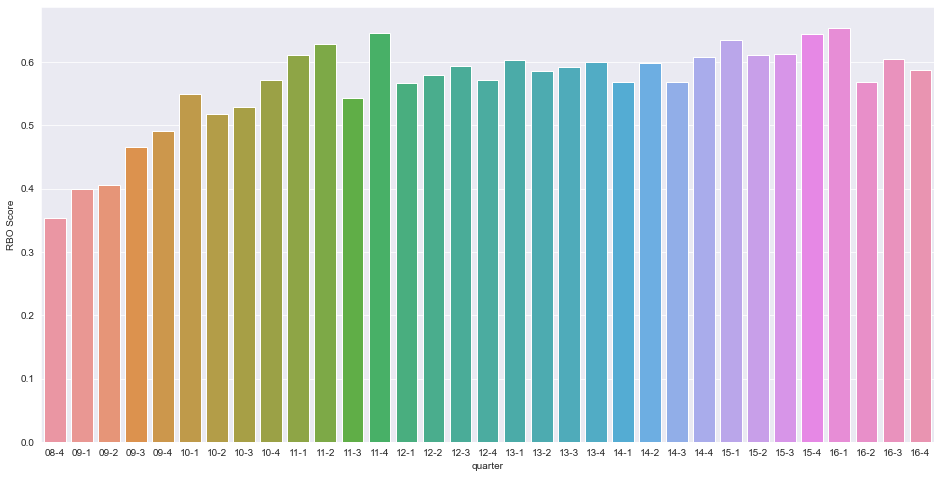

In [179]:
plot_tag_rbo(qbig, tbig, 100)

Since this is an inverse measure from the % difference graphs above, this shows the similarity between each quarter's list and the previous.

This gives a more accurate assessment of how much the top-n tags are changing quarter to quarter. The takeaway I think is that after initial higher volatility (perhaps because of the lower post count in the early first few quarters) most quarters have RBO scores of around 0.55-0.65, which implies a churn/variation in the top-tag list of 35-45%, which doesn't necessarily mean lots of tags disappearing from the list and being replaced with new ones, but also the relative proportions changing which would be reflected in tags moving up and down the ranked list.

## Trends in tag usage

Finally, I'll look at the trends of tags with the most dynamic changes in usage - fastest-growing, and fastest-shrinking.

In [182]:
# Creating the data to plot - 
# For each tag, I'll find the % of all posts with the tag for each quarter,
# and then the slope (difference) from the previous quarter to that quarter.

tag_slopes = {}

q_df = qbig.copy()
t_df = tbig.copy()

tag_per_id = t_df.groupby('Id').size()
id_per_tag = t_df.groupby('Tag').size()

tagid_df = pd.DataFrame()
tagid_df['Id'] = tag_per_id.index.values
tagid_df['tag_count'] = tag_per_id.values

idtag_df = pd.DataFrame()
idtag_df['tag'] = id_per_tag.index.values
idtag_df['id_count'] = id_per_tag.values
idtag_df = idtag_df.sort_values(by='id_count', ascending=True).reset_index().drop('index', axis=1)
idtag_df = idtag_df.iloc[-256:]
top_tags = idtag_df.tag.values

all_quarters = list(q_df['quarter'].unique())
for tag in top_tags:
    tag_slopes[tag] = {'quarter':['08-3'], 'pct':[], 'slope':[0]}


i = 0
    
for quarter in all_quarters:
    q_df2 = q_df[q_df['quarter']==quarter].copy()
    t_df2 = t_df[t_df['Id'].isin(q_df2['Id'].unique())].copy()
    for tag in top_tags:
        if i:
            tag_slopes[tag]['quarter'].append(quarter)
        this_pct = len(t_df2[t_df2['Tag']==tag])/len(q_df2)
        tag_slopes[tag]['pct'].append(this_pct)
        if i:
            prev_pct = tag_slopes[tag]['pct'][-2]
            tag_slopes[tag]['slope'].append(this_pct-prev_pct)
    i += 1

In [197]:
def plot_tag_trends(slopes, tag):
    fig, ax = plt.subplots(figsize=(15,8))
    data = pd.DataFrame(slopes[tag])
    sns.lineplot(data=data, y='pct', x='quarter', marker='o')
    ax.set_title(f"Change in tag usage for tag: '{tag}'")
    plt.show()

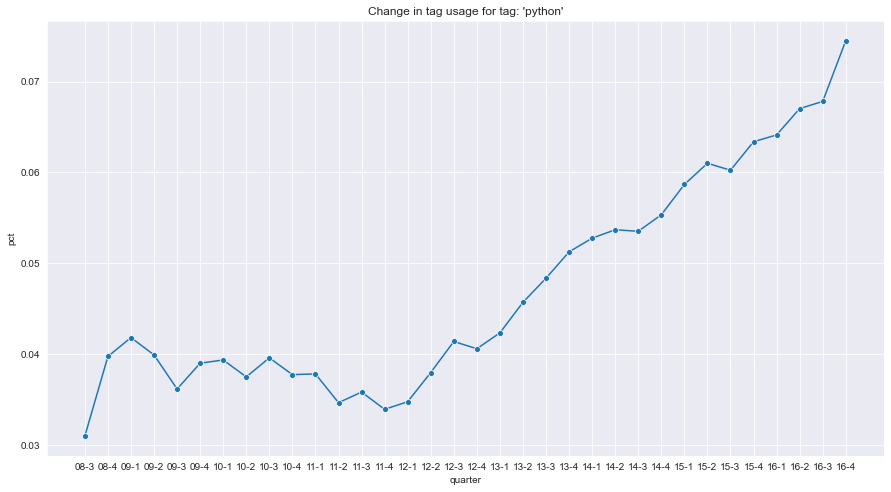

In [200]:
# For example, let's check a tag that has likely grown over time, 'python'

plot_tag_trends(tag_slopes, 'python')

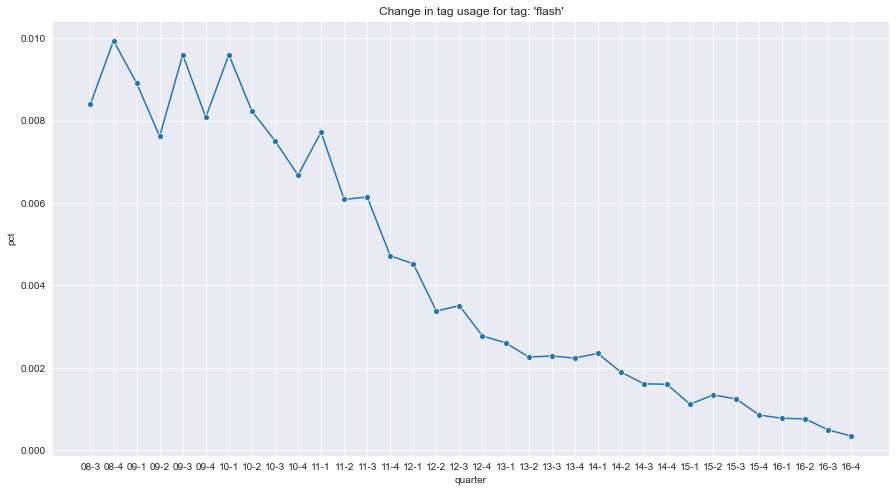

In [201]:
# And now one that has likely diminished, 'flash'

plot_tag_trends(tag_slopes, 'flash')

In [212]:
# To find fastest-growing/-shrinking tags, I'll find some stats like 
# overall_slope, final_slope, and last_year_slope

tag_data = {'tag':[], 'overall_slope':[], 'final_slope':[], 'last_year_slope':[]}

for tag in list(tag_slopes.keys()):
    this_tag_df = pd.DataFrame(tag_slopes[tag])
    tag_data['tag'].append(tag)
    
    this_tag_pct = list(this_tag_df['pct'])
    overall_slope = this_tag_pct[-1] - this_tag_pct[0]
    last_year_slope = this_tag_pct[-1] - this_tag_pct[-5]
    
    tag_data['overall_slope'].append(overall_slope)
    tag_data['final_slope'].append(this_tag_pct[-1])
    tag_data['last_year_slope'].append(last_year_slope)

In [220]:
tag_data = pd.DataFrame(tag_data).sort_values(by='last_year_slope', ascending=False)
tag_data

,tag,overall_slope,final_slope,last_year_slope
41,angular2,0.016518,0.016518,0.014747
249,python,0.043499,0.074503,0.011119
74,reactjs,0.009184,0.009184,0.004035
157,python-3.x,0.009321,0.009321,0.003713
5,apache-spark,0.006717,0.006717,0.003453
...,...,...,...,...
236,angularjs,0.026456,0.026456,-0.005654
255,javascript,0.067488,0.106374,-0.007800
253,c#,-0.049580,0.060247,-0.009337
254,java,0.013912,0.088005,-0.009457


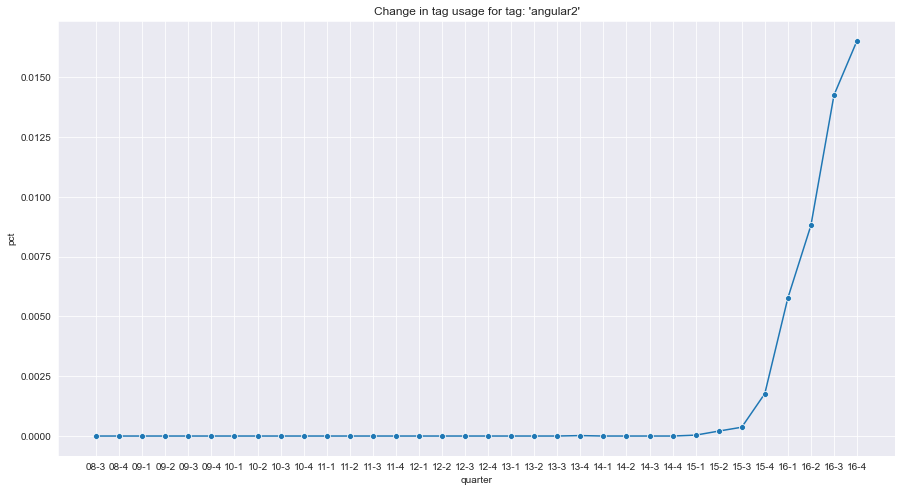

In [214]:
# let's see the fastest-growing slope

plot_tag_trends(tag_slopes, 'angular2')

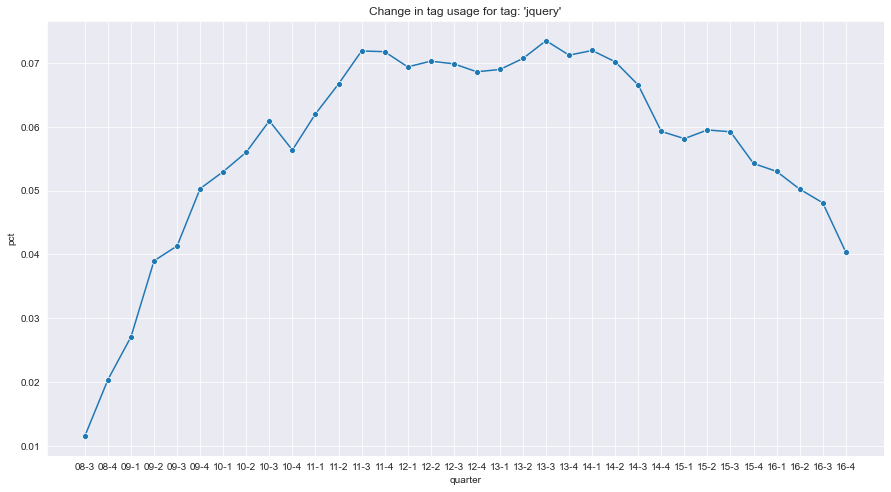

In [211]:
# and the fastest-shrinking

plot_tag_trends(tag_slopes, 'jquery')

In [218]:
for x in range(8):
    print(x % 3)

0
1
2
0
1
2
0
1


In [237]:
sns.color_palette('Set1')[0]

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745)

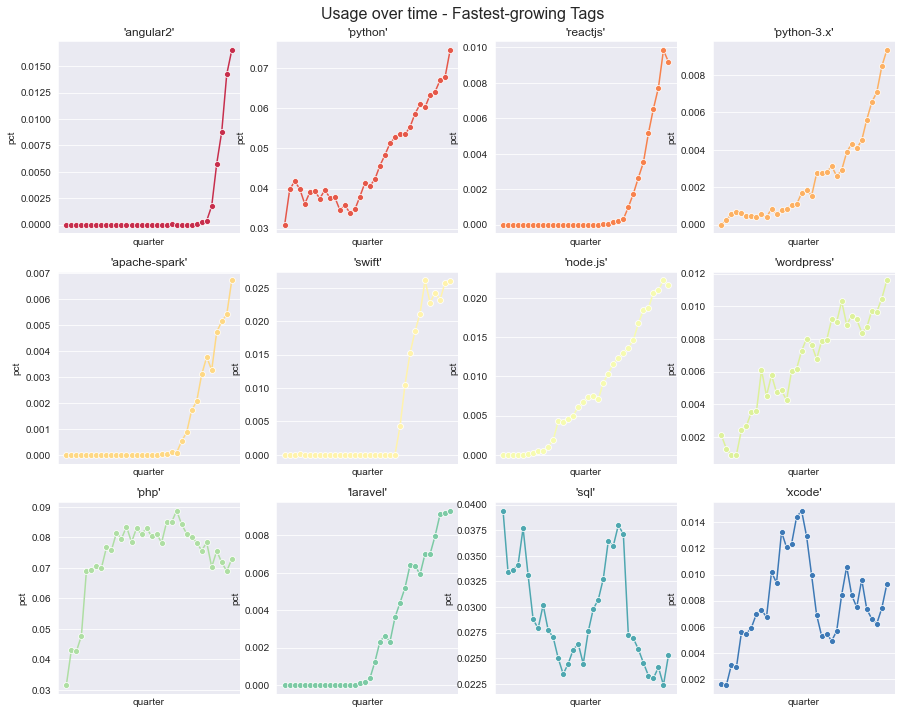

In [258]:
fig, axes = plt.subplots(3, 4, figsize=(15,12))

top_12 = list(tag_data['tag'][:12])

fig.suptitle('Usage over time - Fastest-growing Tags', y=.92, fontsize=16)

i = 0

colors = sns.color_palette('Spectral', n_colors=12)

for row in [0,1,2]:
    for col in [0,1,2,3]:
        tag = top_12[i]
        ax = axes[row][col]
        sns.lineplot(data=tag_slopes[tag], y='pct', x='quarter', marker='o', ax=ax, color=colors[i])
        ax.set_title(f"'{tag}'")
        ax.set_xticks([])
        i += 1

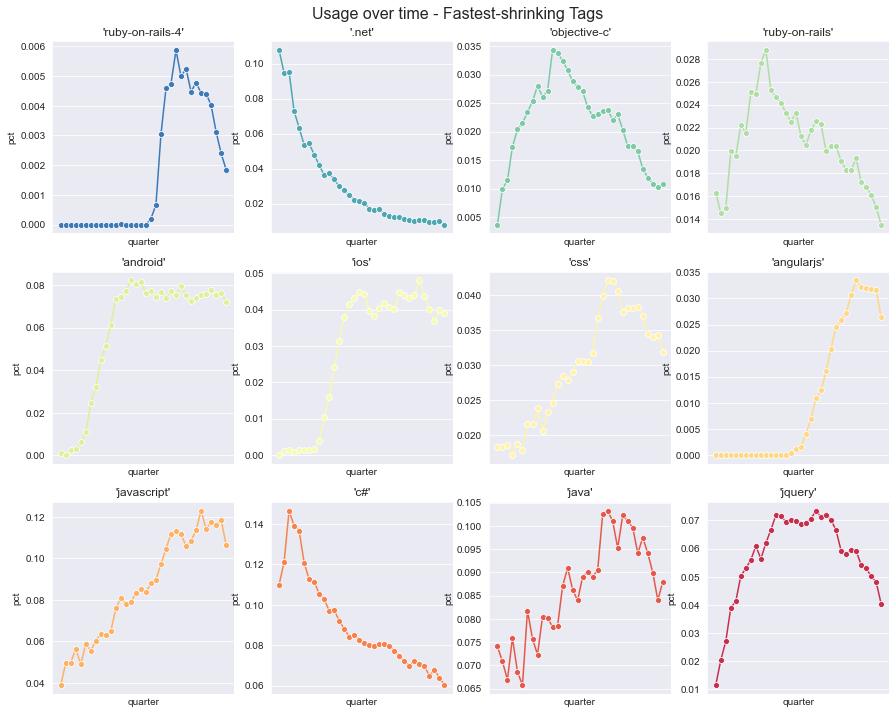

In [260]:
fig, axes = plt.subplots(3, 4, figsize=(15,12))

top_12 = list(tag_data['tag'][-12:])

fig.suptitle('Usage over time - Fastest-shrinking Tags', y=.92, fontsize=16)

i = 0

colors = sns.color_palette('Spectral_r', n_colors=12)

for row in [0,1,2]:
    for col in [0,1,2,3]:
        tag = top_12[i]
        ax = axes[row][col]
        sns.lineplot(data=tag_slopes[tag], y='pct', x='quarter', marker='o', ax=ax, color=colors[i])
        ax.set_title(f"'{tag}'")
        ax.set_xticks([])
        i += 1

These displays of tag trends generally show that there is significant fluctuation of tag usage over time, which might suggest that modelling this may be better served by using smaller models that are up-to-date compared to the data to be tested. For the purposes of this project, this would be building a model with a set amount of posts within a year or other timeframe, and testing it on the posts directly following that time period. In the real world, presumably a model would be built with the most up-to-date posts, and thus can best predict new/incoming posts.